# Home Mortgage Approval Random Forest Classifier

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import RandomOverSampler

plt.rcParams["font.size"] =14

In [3]:
df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")
df['income'] = df['income'].multiply(1000)

/var/folders/8v/8twy7p3n3m535t9m_htmk0h00000gn/T/ipykernel_6081/3743522934.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./Data/actions_taken_1-2-3_state_TN.csv")


In [4]:
needed_cols = ["action_taken", "purchaser_type", "preapproval", "loan_type", "loan_purpose",
               "business_or_commercial_purpose", "loan_amount", "loan_to_value_ratio", "interest_rate", "hoepa_status", 
               "property_value", "occupancy_type", "income", "debt_to_income_ratio", 
               "applicant_credit_score_type"]
 
modified_df = df[needed_cols]
modified_df = modified_df.dropna()
modified_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205118 entries, 1203 to 282624
Data columns (total 15 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   action_taken                    205118 non-null  int64  
 1   purchaser_type                  205118 non-null  int64  
 2   preapproval                     205118 non-null  int64  
 3   loan_type                       205118 non-null  int64  
 4   loan_purpose                    205118 non-null  int64  
 5   business_or_commercial_purpose  205118 non-null  int64  
 6   loan_amount                     205118 non-null  float64
 7   loan_to_value_ratio             205118 non-null  object 
 8   interest_rate                   205118 non-null  object 
 9   hoepa_status                    205118 non-null  int64  
 10  property_value                  205118 non-null  object 
 11  occupancy_type                  205118 non-null  int64  
 12  income            

In [5]:
modified_df['loan_to_value_ratio'] = modified_df['loan_to_value_ratio'].replace('Exempt', 8888)
modified_df['interest_rate'] = modified_df['interest_rate'].replace('Exempt', 8888)
modified_df['property_value'] = modified_df['property_value'].replace('Exempt', 8888)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('Exempt', 8888)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('20%-<30%', 25)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('30%-<36%', 33)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('<20%', 15)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('50%-60%', 55)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].replace('>60%', 65)

In [6]:
modified_df['loan_to_value_ratio'] = modified_df['loan_to_value_ratio'].astype(float)
modified_df['interest_rate'] = modified_df['interest_rate'].astype(float)
modified_df['property_value'] = modified_df['property_value'].astype(float)
modified_df['debt_to_income_ratio'] = modified_df['debt_to_income_ratio'].astype(float)

In [7]:
modified_df['action_taken'] = modified_df['action_taken'].replace([1,2,3], [1,1,0])

In [8]:
modified_df = modified_df.reset_index(drop=True)
modified_df.head()

,action_taken,purchaser_type,preapproval,loan_type,loan_purpose,business_or_commercial_purpose,loan_amount,loan_to_value_ratio,interest_rate,hoepa_status,property_value,occupancy_type,income,debt_to_income_ratio,applicant_credit_score_type
0,1,71,2,1,1,2,405000.0,80.0,7.125,2,505000.0,3,116000.0,42.0,1
1,1,71,2,2,1,2,155000.0,96.5,3.500,2,165000.0,1,67000.0,43.0,1
2,1,1,2,1,1,2,175000.0,68.0,4.875,2,255000.0,1,66000.0,33.0,2
3,1,1,2,1,1,2,475000.0,80.0,4.625,2,595000.0,1,214000.0,15.0,9
4,1,71,2,2,1,2,335000.0,96.5,3.875,2,335000.0,1,84000.0,44.0,3


In [9]:
features = ["purchaser_type", "preapproval", "loan_type", "loan_purpose",
               "business_or_commercial_purpose", "loan_amount", "loan_to_value_ratio", "interest_rate", "hoepa_status", 
               "property_value", "occupancy_type", "income", "debt_to_income_ratio", 
               "applicant_credit_score_type"]
X = modified_df[features]
y = np.array(modified_df['action_taken'])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
X_subtrain, X_val, y_subtrain, y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.125)

In [12]:
data_table = pd.DataFrame(columns=["Depth", "Training Accuracy", "Testing Accuracy"])

for depth in range(2, 21):
    dclf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    dclf.fit(X_subtrain, y_subtrain)
    y_subtrain_predict = dclf.predict(X_subtrain)
    y_val_predict = dclf.predict(X_val)
    accuracy_score_train = accuracy_score(y_subtrain, y_subtrain_predict)
    accuracy_score_test = accuracy_score(y_val, y_val_predict)
    data_table.loc[len(data_table)] = {"Depth": depth, "Training Accuracy": accuracy_score_train, "Testing Accuracy": accuracy_score_test}
    

print(data_table)

    Depth  Training Accuracy  Testing Accuracy
0       2           0.995160          0.994784
1       3           0.995160          0.994784
2       4           0.995160          0.994784
3       5           0.995160          0.994784
4       6           0.995550          0.995174
5       7           0.995877          0.995515
6       8           0.996427          0.996344
7       9           0.996539          0.996344
8      10           0.996908          0.996636
9      11           0.997158          0.996490
10     12           0.997437          0.996587
11     13           0.997736          0.996441
12     14           0.998133          0.996441
13     15           0.998454          0.996539
14     16           0.998907          0.996392
15     17           0.999248          0.996149
16     18           0.999450          0.996344
17     19           0.999610          0.996295
18     20           0.999707          0.996100


In [13]:
clf = RandomForestClassifier(n_estimators=100, max_depth=18, random_state=42)
clf.fit(X_train, y_train)
y_train_predict = clf.predict(X_train)
y_test_predict = clf.predict(X_test)
print(accuracy_score(y_train, y_train_predict))
print(accuracy_score(y_test, y_test_predict)) 

0.9993784050605141
0.9963923556942278


In [14]:
print(f1_score(y_test, y_test_predict))

0.9981876515392717


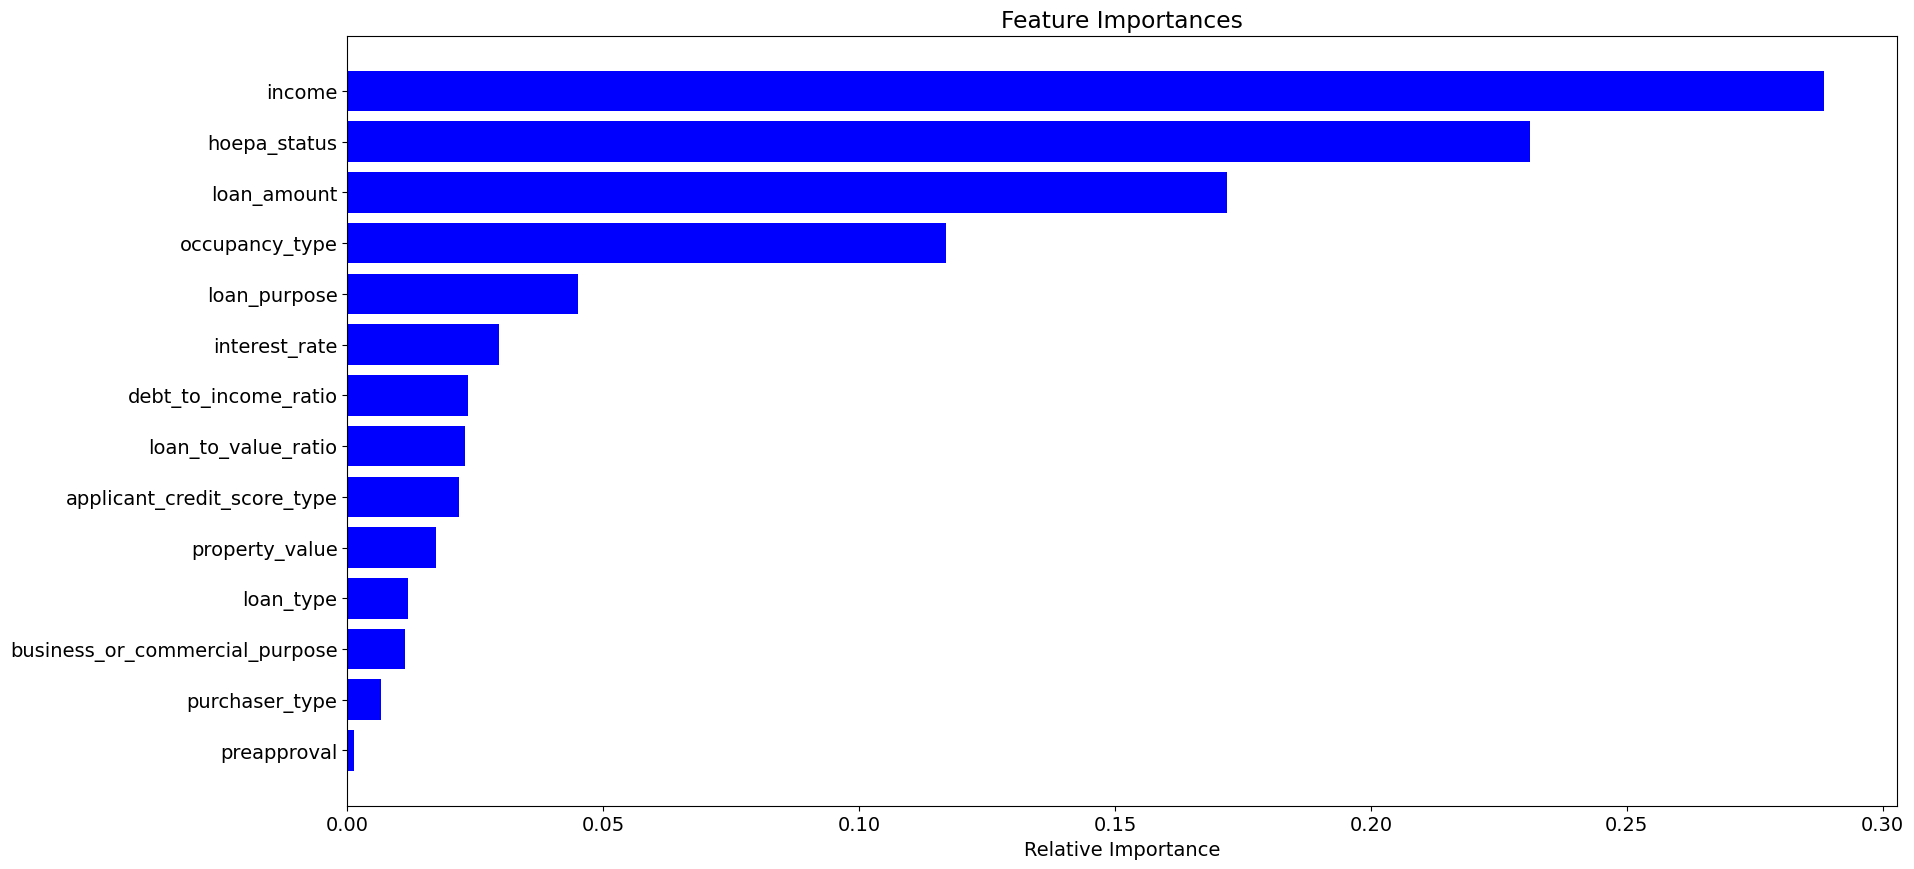

In [15]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(20,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

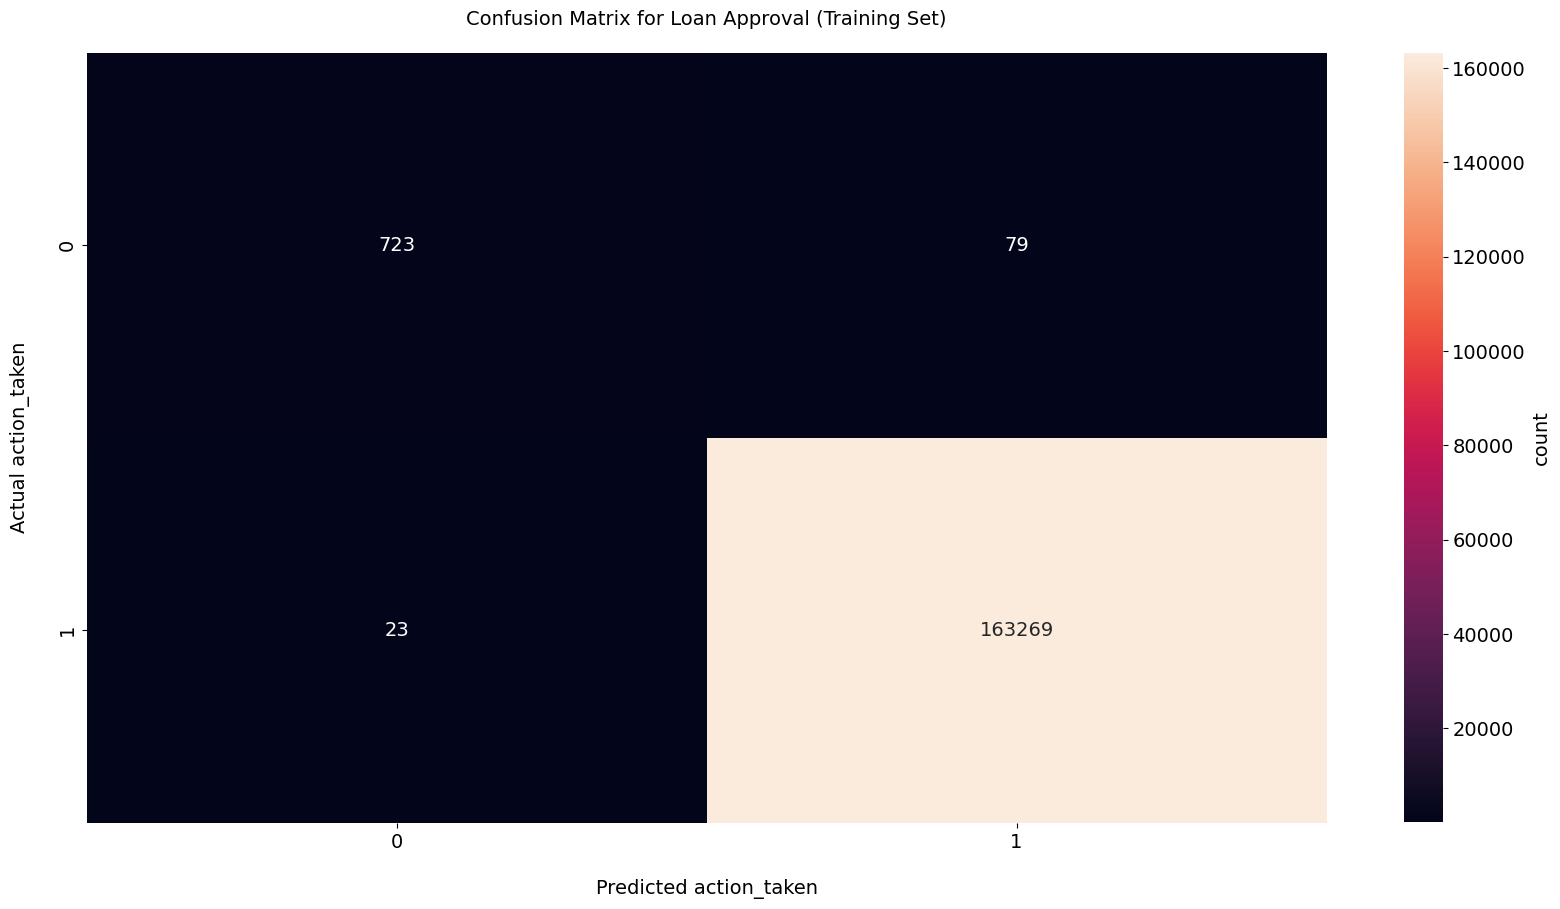

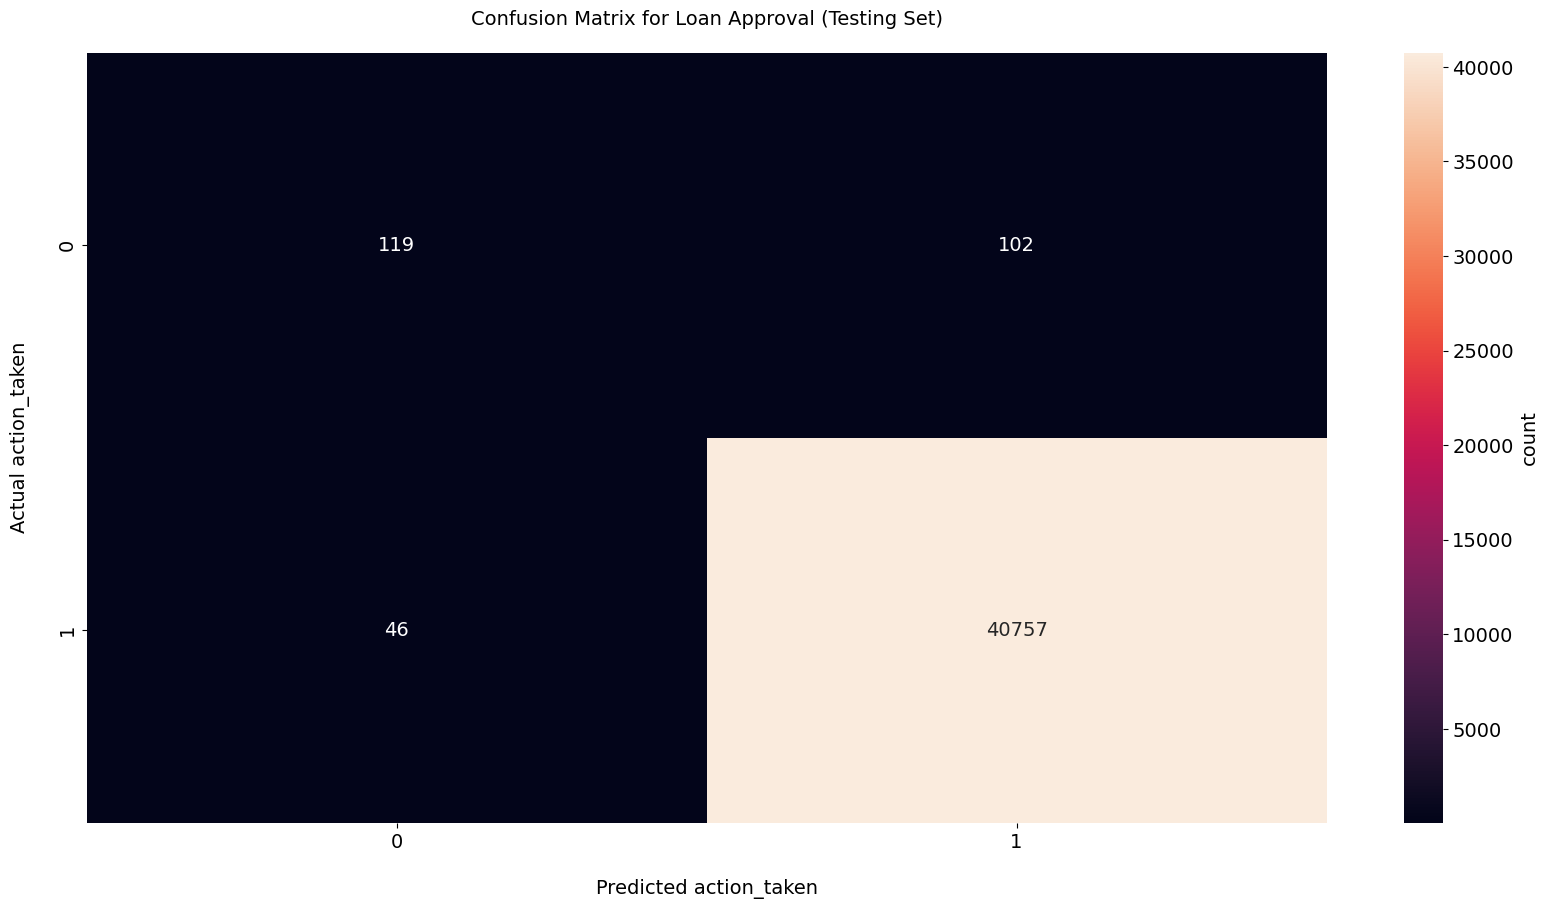

In [16]:
cm_train = confusion_matrix(y_train, y_train_predict)
cm = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(20,10))
ax = sns.heatmap(cm_train, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Training Set)", fontsize=14, pad=20)
plt.show()

plt.figure(figsize=(20,10))
ax = sns.heatmap(cm, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Testing Set)", fontsize=14, pad=20)
plt.show()

### Random Forest on Oversampled Data

In [11]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

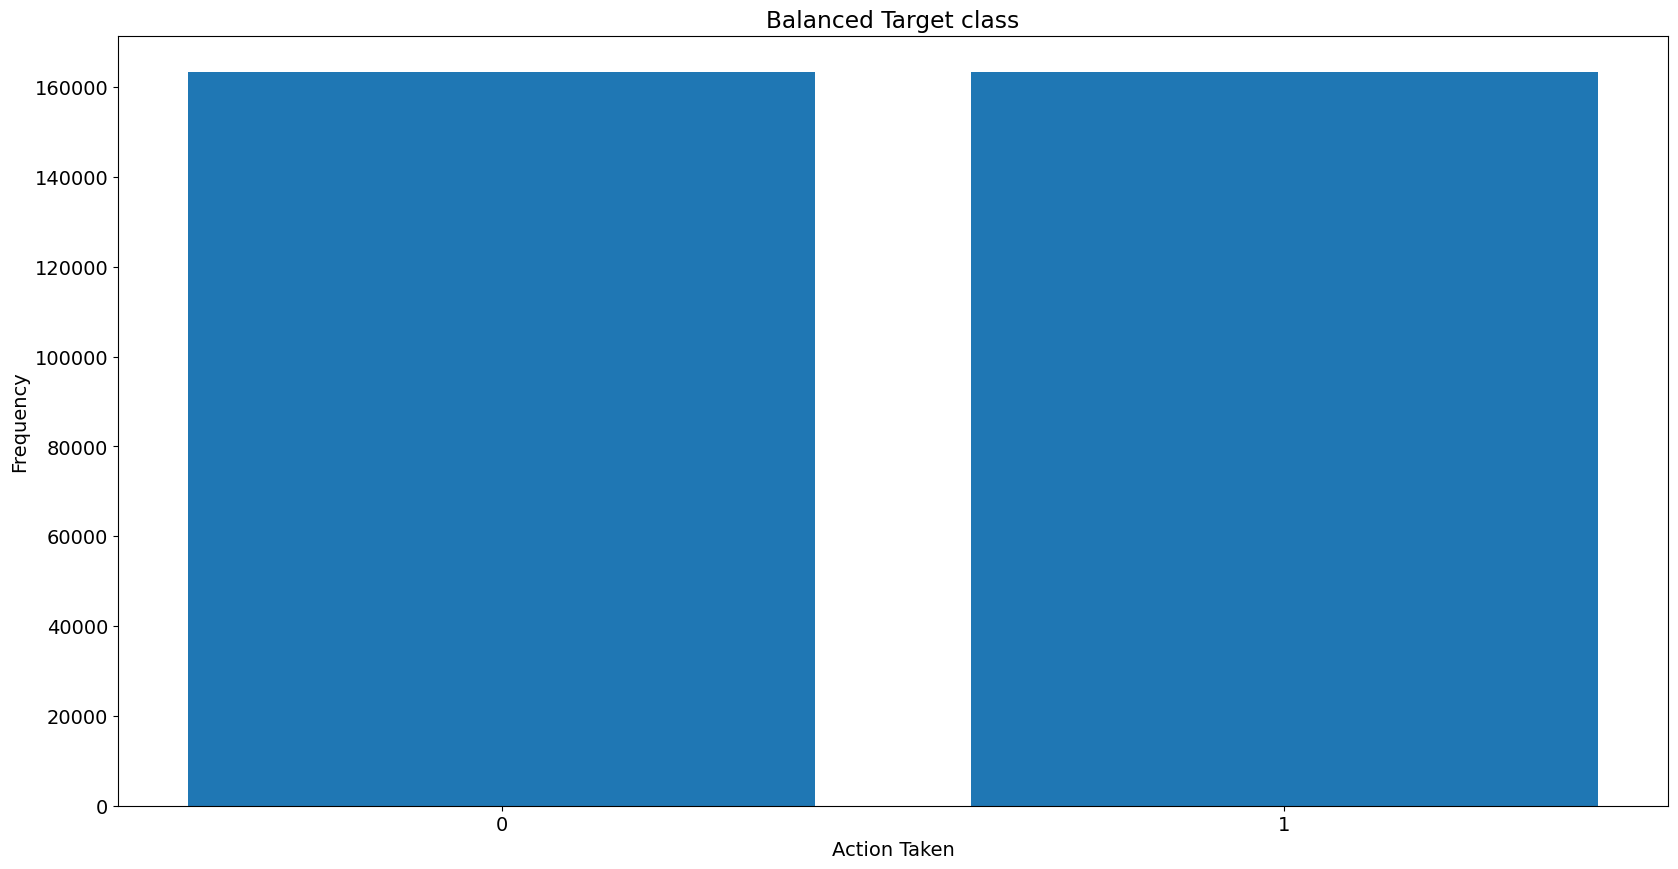

In [12]:
plt.figure(figsize=(20,10))
y_resampled_unique, counts = np.unique(y_resampled, return_counts=True)
plt.bar(y_resampled_unique, counts)
plt.xlabel("Action Taken")
plt.ylabel("Frequency")
plt.xticks([0,1])
plt.title("Balanced Target class")
plt.show()

In [19]:
X_subtrain_res, X_val_res, y_subtrain_res, y_val_res = train_test_split(X_resampled, y_resampled, random_state=42, test_size=0.125)

In [20]:
data_table = pd.DataFrame(columns=["Depth", "Training Accuracy", "Testing Accuracy"])

for depth in range(2, 40, 2):
    dclf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42)
    dclf.fit(X_subtrain_res, y_subtrain_res)
    y_subtrain_res_predict = dclf.predict(X_subtrain_res)
    y_val_res_predict = dclf.predict(X_val_res)
    accuracy_score_train = accuracy_score(y_subtrain_res, y_subtrain_res_predict)
    accuracy_score_test = accuracy_score(y_val_res, y_val_res_predict)
    data_table.loc[len(data_table)] = {"Depth": depth, "Training Accuracy": accuracy_score_train, "Testing Accuracy": accuracy_score_test}
    

print(data_table)

    Depth  Training Accuracy  Testing Accuracy
0       2           0.979238          0.980452
1       4           0.992525          0.992847
2       6           0.992767          0.992896
3       8           0.993022          0.993141
4      10           0.994023          0.993949
5      12           0.994429          0.994292
6      14           0.995405          0.995052
7      16           0.996595          0.996203
8      18           0.997613          0.997134
9      20           0.998541          0.997624
10     22           0.999220          0.998212
11     24           0.999685          0.998530
12     26           0.999864          0.998628
13     28           0.999892          0.998555
14     30           0.999895          0.998579
15     32           0.999895          0.998530
16     34           0.999895          0.998555
17     36           0.999895          0.998555
18     38           0.999895          0.998555


In [13]:
clf = RandomForestClassifier(n_estimators=100, max_depth=34, random_state=42)
clf.fit(X_resampled, y_resampled)
y_train_predict = clf.predict(X_resampled)
y_test_predict = clf.predict(X_test)
print(accuracy_score(y_resampled, y_train_predict))
print(accuracy_score(y_test, y_test_predict)) 

0.9998989540210176
0.9960023400936038


In [14]:
print(f1_score(y_test, y_test_predict))

0.9979904423477515


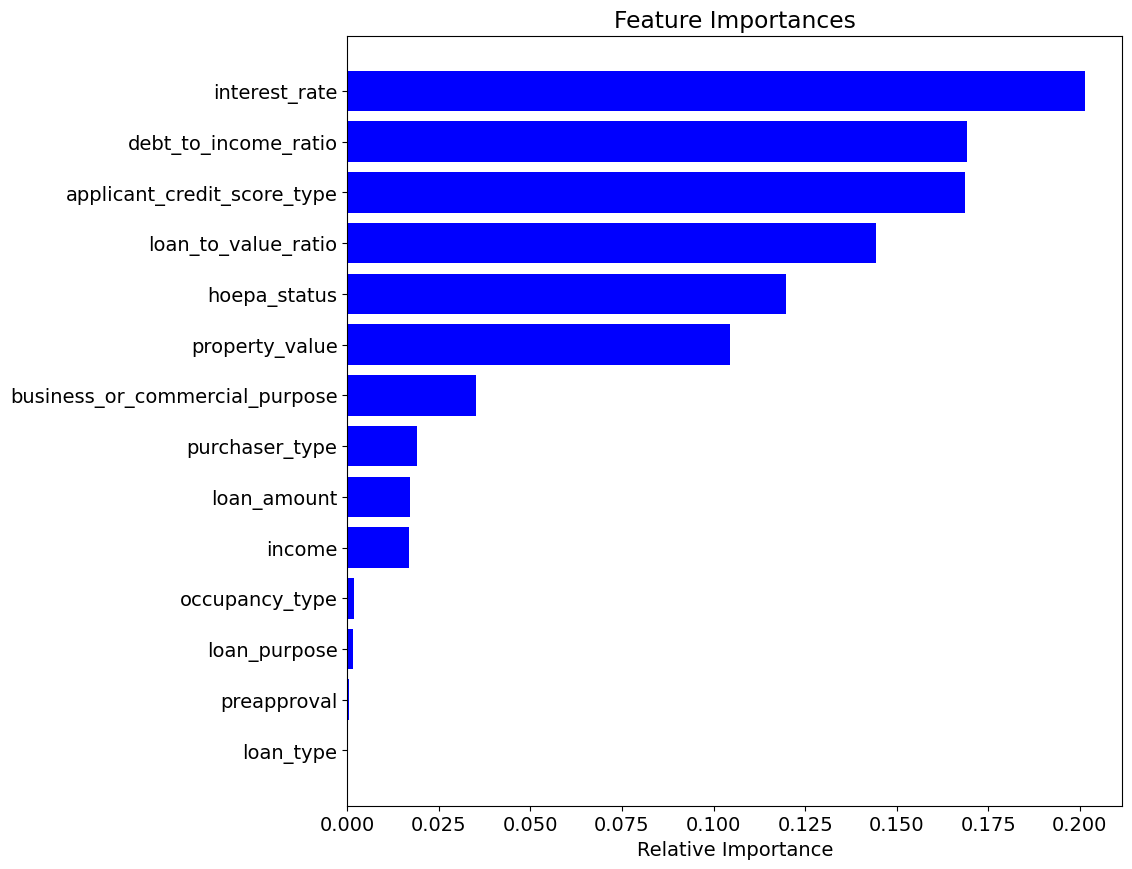

In [17]:
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

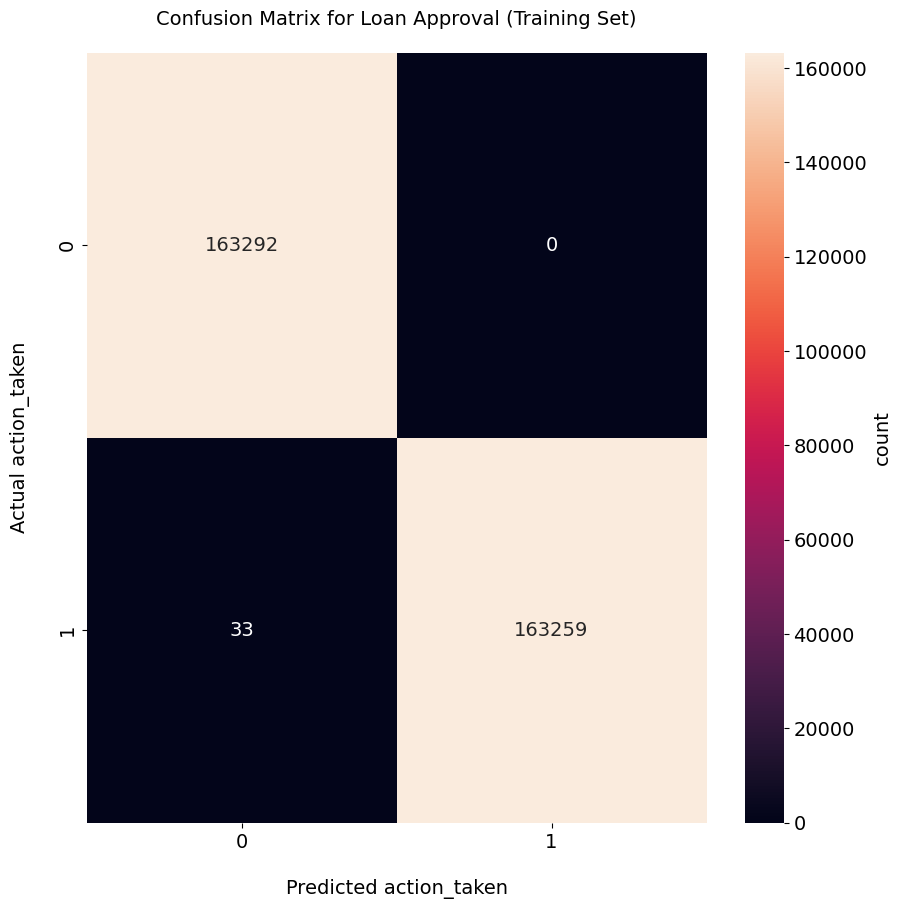

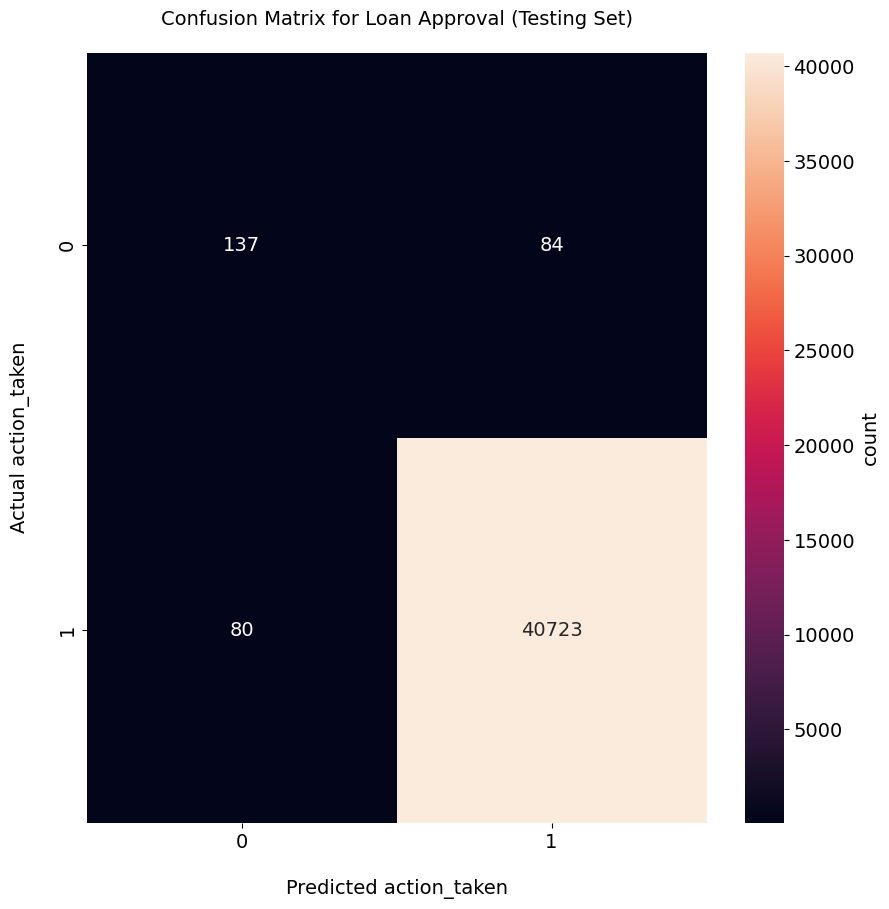

In [16]:
cm_train = confusion_matrix(y_resampled, y_train_predict)
cm = confusion_matrix(y_test, y_test_predict)

plt.figure(figsize=(10,10))
ax = sns.heatmap(cm_train, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Training Set)", fontsize=14, pad=20)
plt.show()

plt.figure(figsize=(10,10))
ax = sns.heatmap(cm, annot=True, fmt='d', cbar_kws={'label': 'count'})
ax.set_xlabel("Predicted action_taken", labelpad=20)
ax.xaxis.set_ticklabels([0,1])
ax.set_ylabel("Actual action_taken", labelpad=20)
ax.yaxis.set_ticklabels([0,1])
ax.set_title("Confusion Matrix for Loan Approval (Testing Set)", fontsize=14, pad=20)
plt.show()